In [2]:
%matplotlib inline

import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))
from collections import defaultdict

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.decomposition import PCA, KernelPCA

import torch
from torch.utils.data import DataLoader

from src.datasets.manifolds import SwissRoll, SCurve, Spheres

#from src.datasets.splitting import split_dataset

torch.manual_seed(42)
np.random.seed(42)

In [5]:
train=True
dataset = Spheres(train=train)

In [38]:
from src.evaluation.eval import Multi_Evaluation
from src.evaluation.utils import get_space
#from src.evaluation.eval import evaluate_space

batch_size = 64
# LOAD ALL MODELS AND GET SPACES

methods = ['toporeg_edge_symmetric', 'pca']
#methods = ['toporeg', 'toporeg_vertex', 'toporeg_edge_oneway', 'toporeg_edge_symmetric', 'surrogate', 'vanilla'] #'surrogate'
datasets = ['spheres','swissroll', 'scurve'] # 'spheres',

#hard coded run ids:
##older runs: all 50 epochs
#run_ids = [2,4,5,6,12,7,8,9,10,11] #ids mapping above method+dataset to run directory
##newer runs: swissroll on 200 epochs:
#new_run_ids = [3,4,5,1,2] #for 200epochs..
#run_index = 0 # points to current run in run_ids
#path = '../runs/synthetic_experiments/{}/model.pth'
#new_path = '../runs/synthetic_experiments/200_epochs/{}/model.pth'
train=True #True False
path = '../exp_runs/train_model/synthetic_experiments/{}/model.pth'


# LOAD DATASETS:
datasets_ = {datasets[0]: Spheres(train=train), datasets[1]: SwissRoll(train=train), datasets[2]: SCurve(train=train)}
#datasets_ = {datasets[0]: SwissRoll(train=train), datasets[1]: SCurve(train=train)}


# Classical dim red methods: 
dim_red_methods = ['pca']
dim_red_dict = {'pca':PCA } #'tsne':TSNE, 'umap':umap.UMAP}
dim_red_Zs = []

experiments = defaultdict(lambda: defaultdict(dict))

#Gathering all paths in one dict of dicts:
for dataset in datasets[2:3]:
    
    #define dataloader:
    dataloader = DataLoader(datasets_[dataset], batch_size=batch_size, shuffle=False,
            pin_memory=True, drop_last=True)
    
    experiments[dataset]['data_space'], labels = get_space(None, dataloader, mode='data')
    
    if dataset == 'spheres':
        experiments[dataset]['labels'] = labels

    #Compute classical dim reds:
    X = experiments[dataset]['data_space']
    for method in dim_red_methods:
        #if method == 'umap':
        #    Z = 
        #else:
        Z = dim_red_dict[method](n_components=2, random_state=42).fit_transform(X)
        experiments[dataset][method]['latent'] = Z
    
    
    for method in methods:
        if method not in dim_red_methods:
            #init dict:
            #experiments[dataset][method] = {}

            #determine current model path:

            #older, hard-coded way:
            #if dataset == 'swissroll':
            #    curr_path = new_path.format(new_run_ids[run_index])
            #else:
            #    curr_path = path.format(run_ids[run_index])

            curr_path = path.format('_'.join([dataset,method]))
            model = torch.load(curr_path)

            #Keep path, model, and latent space in dict:
            experiments[dataset][method]['path'] = curr_path 
            experiments[dataset][method]['model'] = model

            latent, labels = get_space(model, dataloader, mode='latent')

            experiments[dataset][method]['latent'] = latent
            experiments[dataset][method]['labels'] = labels
        
        #Eval mulitple metrics:
        latent = experiments[dataset][method]['latent'] #also classic dimred methods here
        k = 50
        print(method)
        multi = Multi_Evaluation()
        data = experiments[dataset]['data_space']
        
        #subsampling for speed:
        n_samples = 300
        data, _ = multi.subsample(data, n_samples*[0], n_samples)
        latent, _ = multi.subsample(latent, n_samples*[0], n_samples)

        results = multi.evaluate_space(data, latent, labels=None, K=k)
        experiments[dataset][method]['results'] = results
        
#Eval kNN properties:
#if dataset=='spheres':
# results = evaluate_space(latent, labels, k=15)
# experiments[dataset][method]['results'] = results
         

/home/mimoor/.local/share/virtualenvs/topologically-constrained-autoencoder-TrUlG6DW/lib/python3.6/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'src.models.approx_based.TopologicallyRegularizedAutoencoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/mimoor/.local/share/virtualenvs/topologically-constrained-autoencoder-TrUlG6DW/lib/python3.6/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'src.models.approx_based.TopologicalSignatureDistance' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


toporeg_edge_symmetric
pca


In [39]:
experiments['scurve']['pca']['results'] #toporeg_edge_symmetric

{'stress': 0.35122856,
 'rmse': 0.6965124555199601,
 'trustworthiness': [0.8417673378076063,
  0.8482574480044969,
  0.8477363465160075,
  0.8496223736513344,
  0.8479840182648402,
  0.8542340791738382,
  0.8516526610644257,
  0.8514797101449275,
  0.8504687904687904,
  0.849884007029877,
  0.8510076025270372,
  0.8526169330965068,
  0.8538049450549451,
  0.8543421390100026,
  0.8548567990373044,
  0.8564246823956443,
  0.8570788607413768,
  0.8555181787291879,
  0.8547847478474785,
  0.8557860235003092,
  0.85613894811656,
  0.8557354028085735,
  0.8562876674870112,
  0.8565348935273034,
  0.8562631043256997,
  0.8567168659874994,
  0.8573973973973974,
  0.8575242718446602,
  0.858419989224138,
  0.8587579131194063,
  0.8589663819116835,
  0.8598600066269052,
  0.8595377777777777,
  0.8601629384148025,
  0.8611177944862155,
  0.8612981820924794,
  0.862072072072072,
  0.8623718574787484,
  0.8627914317125935,
  0.8632776617954071,
  0.8637429117988659,
  0.8648709688244571,
  0.865828

In [40]:
experiments['scurve']['toporeg_edge_symmetric']['results'] #toporeg_edge_symmetric

{'stress': 2.7975633,
 'rmse': 1.7875433172684547,
 'trustworthiness': [0.9678299776286353,
  0.9718100056211355,
  0.9698606403013182,
  0.9698069278818853,
  0.9694954337899543,
  0.9701204819277108,
  0.9702010215851047,
  0.9689565217391304,
  0.9679448329448329,
  0.9668763913298184,
  0.9659214048613342,
  0.9651174264850997,
  0.9634844322344323,
  0.9626767547234334,
  0.9607372643401524,
  0.9590456745311555,
  0.9583519393158724,
  0.9571675161399932,
  0.955471612610863,
  0.9539177489177489,
  0.9521481876332623,
  0.9504076411393485,
  0.9486240087503418,
  0.9467130508117225,
  0.9446549618320611,
  0.9430857817805994,
  0.9416688116688117,
  0.9403083680073971,
  0.9383503951149426,
  0.9363951102379393,
  0.9346716817544307,
  0.9325828363154407,
  0.9302149494949495,
  0.9280620980786681,
  0.926539039907461,
  0.9252455306630459,
  0.9235135135135135,
  0.9224821848435522,
  0.9215327871759407,
  0.9200222686151704,
  0.9190305390448863,
  0.9175807913017215,
  0.9163

In [22]:
experiments[dataset]['pca']['latent'].shape

(9856, 2)

In [27]:
experiments['spheres']['toporeg_edge_symmetric']['results']

{'stress': 21.200907,
 'rmse': 13.912359013960693,
 'trustworthiness': [0.8752237136465324,
  0.8720629567172569,
  0.8708097928436911,
  0.8734752981260647,
  0.8788493150684932,
  0.8827691719257984,
  0.8849744603723843,
  0.8879246376811594,
  0.8904972804972805,
  0.8923514938488577,
  0.895086197665703,
  0.8960913755673969,
  0.8967335164835165,
  0.8968359408395314,
  0.8985535499398315,
  0.8989821536600121,
  0.8993115786460569,
  0.8976622494053687,
  0.8973470576811031,
  0.8955893630179345,
  0.8928725420516466,
  0.8918471772130309,
  0.8905086136177194,
  0.8872601728863588,
  0.8842936386768447,
  0.8815040110241645,
  0.8786238619571953,
  0.8752283865002312,
  0.8703044181034483,
  0.866392927308448,
  0.8629584767733436,
  0.8598604208084825,
  0.8564783838383838,
  0.8538860614668402,
  0.8516645459803355,
  0.8489088783284302,
  0.8455198641264215,
  0.8418563935612227,
  0.8386952512678654,
  0.8357219902574808,
  0.8335850925736148,
  0.8308574113225276,
  0.8282

In [15]:
#Additional dim red methods for comparison:
import umap

dim_red_methods = ['pca','tsne', 'umap']
dim_red_dict = {'pca':PCA, 'tsne':TSNE, 'umap':umap.UMAP}
dim_red_Zs = []
for dataset in datasets[:1]:
    X = experiments[dataset]['data_space']
    for method in dim_red_methods:
        #if method == 'umap':
        #    Z = 
        #else:
        Z = dim_red_dict[method](random_state=42).fit_transform(X)
        experiments[dataset][method]['latent'] = Z



In [26]:
X = experiments[dataset]['data_space']

(1088, 101)

In [5]:
def plotting(transformed, all_labels, title):
    plt.scatter(transformed[:, 0], transformed[:, 1], c=all_labels, cmap=plt.cm.Spectral, alpha=0.4)
    plt.title(title)

def plott_all(dataset_name, X,labels, methods, all_Z):
    fig = plt.figure(1)
    
    subplot_count = 1
    h,w = 5,2
    ax = fig.add_subplot(h,w,subplot_count, projection="3d")
    
    #Plot Swiss Roll Data:
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap=plt.cm.Spectral)

    plt.xticks([]), plt.yticks([])
    myfontsize = 18
    plt.title(dataset_name, fontsize=myfontsize)
    ax.set_xlabel('x', fontsize=myfontsize)
    ax.set_ylabel('y', fontsize=myfontsize)
    ax.set_zlabel('z', fontsize=myfontsize)
    fig.set_size_inches(12, 20)
    ax.view_init(5, 280) # rotation of the 3D plot
    plt.show()
    
    subplot_count+=1
    for method, latent in zip(methods, all_Z):
        #add subplots for latent spaces:
        print(subplot_count)
        ax = fig.add_subplot(h,w,subplot_count)
        plotting(latent, labels, f'2D Latent Space {method}')
        subplot_count += 1
 
    # hard-coded:
    #     ax = fig.add_subplot(322)
    #     plotting(all_Z[0], labels, f'2D Latent Space {methods[0]}')

    #     ax = fig.add_subplot(323)
    #     plotting(all_Z[1], labels, f'2D Latent Space {methods[1]}')

    #     ax = fig.add_subplot(324)
    #     plotting(all_Z[2], labels, f'2D Latent Space {methods[2]}')

    #     ax = fig.add_subplot(325)
    #     plotting(all_Z[3], labels, f'2D Latent Space {methods[3]}')

    #     ax = fig.add_subplot(326)
    #     plotting(all_Z[4], labels, f'2D Latent Space {methods[4]}')
    
    

<IPython.core.display.Javascript object>


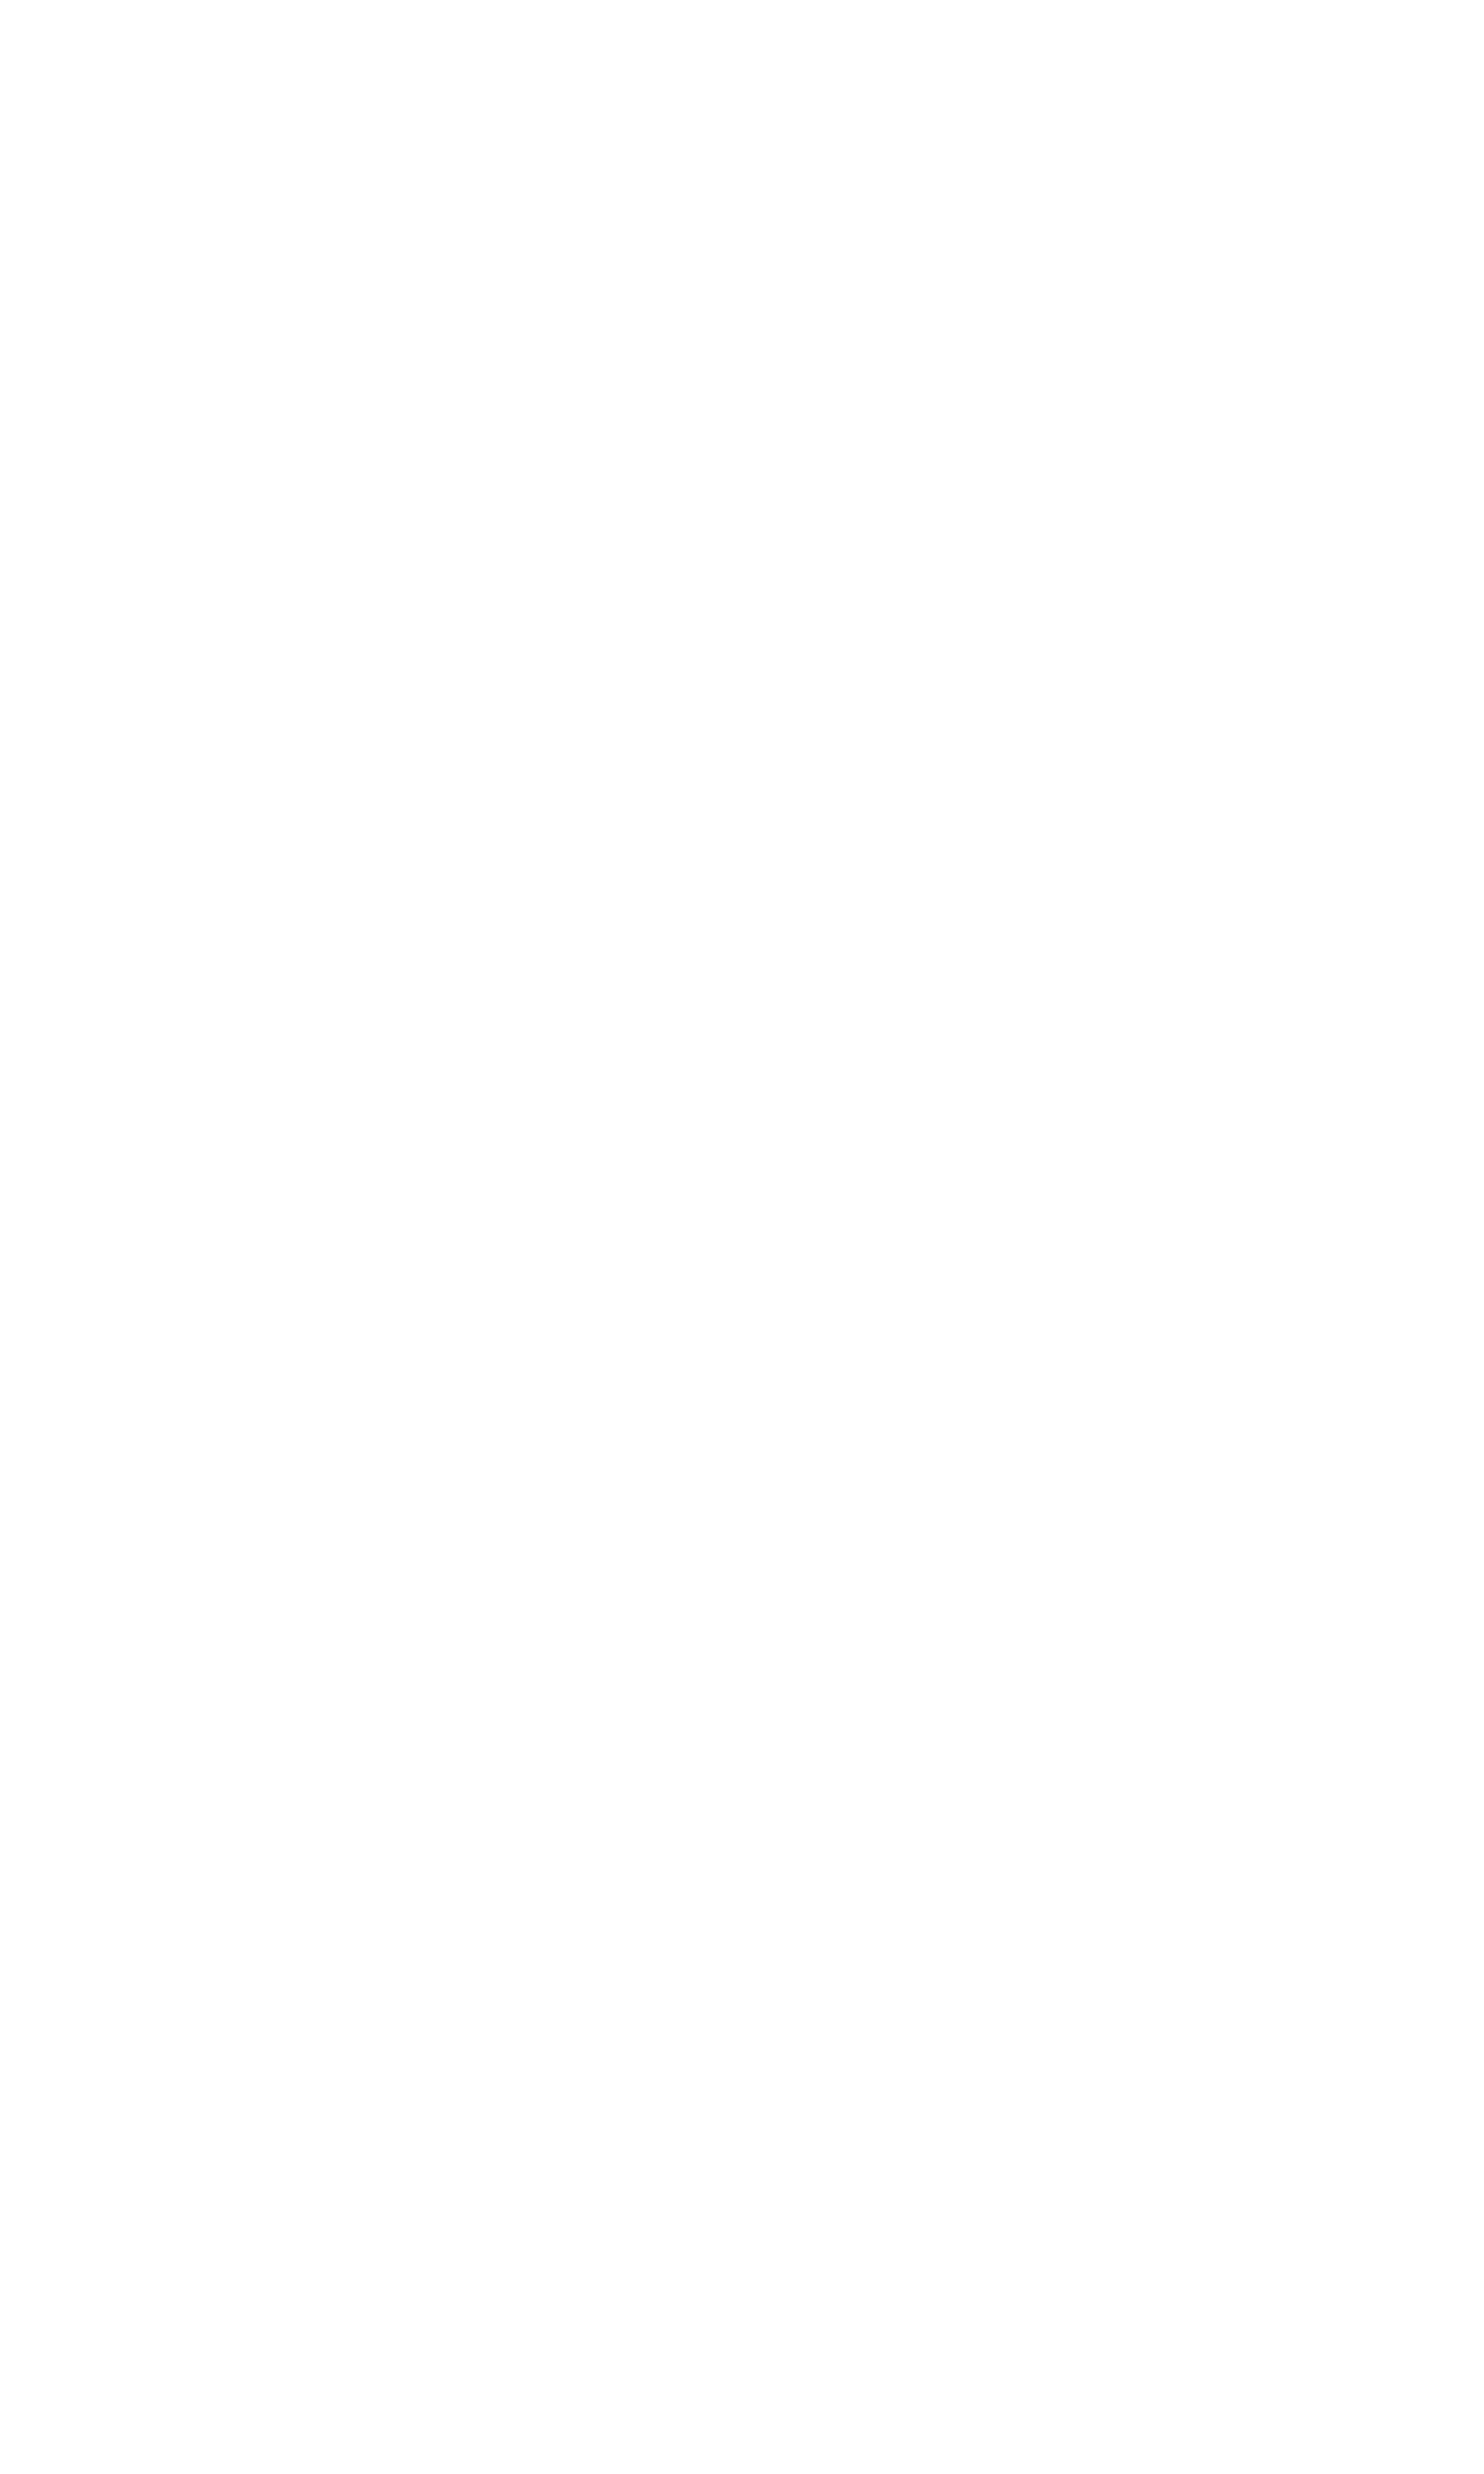

2
3
4
5
6
7
8
9
10


In [6]:
%matplotlib notebook

dataset= 'spheres' #'swissroll' #'scurve' #'spheres'
#methods = ['topo_pure', 'topo_vertex', 'topo_edge', 'surrogate', 'vanilla']
    
X = experiments[dataset]['data_space']
labels = experiments[dataset][methods[0]]['labels']

all_methods = methods + dim_red_methods
all_Z = [experiments[dataset][method]['latent'] for method in all_methods]

#Z2 = experiments[dataset][methods[4]]['latent']

plott_all(dataset, X, labels, all_methods, all_Z)
plt.savefig(f'200_epochs_{dataset}_train_{train}.png')

### kNN Evaluation

In [7]:
from  src.evaluation.knn_utils import get_k_predictions, get_NMI, get_acc

<IPython.core.display.Javascript object>


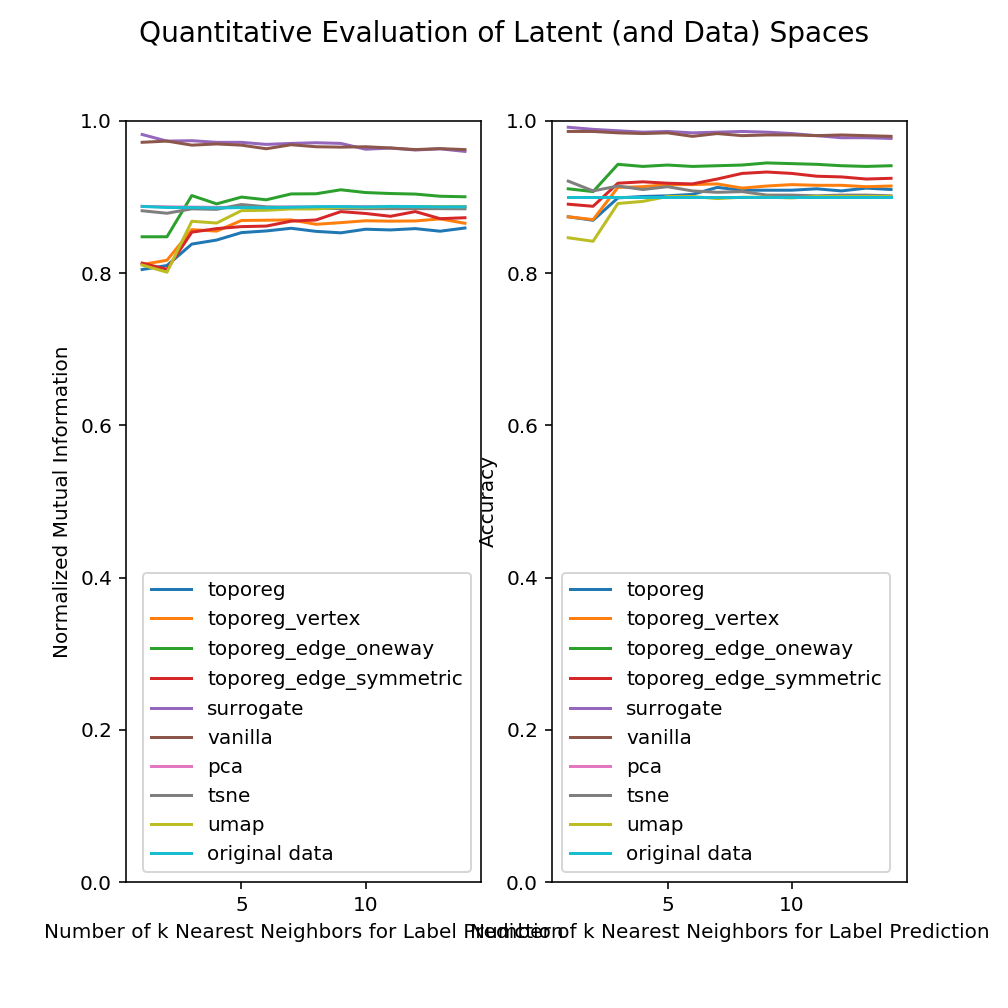

In [51]:
#for this cell, run above plot first!

def plot_scores(ax, method, embeddings, labels, metric, k=15):
    #first get predicted labels (based on up to k neighbors)
    k_preds = get_k_predictions(embeddings, labels, k=k)
    
    #for each int up to k get a NMI score of how well the neighborhood labels vote for the correct label
    scores = metric(k_preds, labels)
    ax.plot( np.arange(1,len(scores)+1), scores, label=method)

    return 

labels = experiments[dataset][methods[0]]['labels']


if len(all_Z) < 10: #only do this once when rerunning the cell
    all_methods = all_methods + ['original data']
    all_Z.append(X)

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(7, 7)
for ind, method in enumerate(all_methods):
    for ax, metric in zip( [ax1, ax2],[get_NMI,get_acc]):
        plot_scores(ax, method, all_Z[ind], labels, metric=metric, k=15)

ax1.set_ylim((0., 1)) 
ax1.set_ylabel('Normalized Mutual Information')
ax1.set_xlabel('Number of k Nearest Neighbors for Label Prediction')
ax1.legend(loc='lower right')
ax2.set_ylim((0., 1)) 
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Number of k Nearest Neighbors for Label Prediction')
ax2.legend(loc='lower right')

plt.legend()
f.suptitle(f"Quantitative Evaluation of Latent (and Data) Spaces", fontsize=14)

plt.savefig(f'spheres_scoring_train_{train}.pdf')


### Correlation of Distances for Evaluation

In [7]:
# INSTEAD OF KNN, run plotting cells above to get raw 'all_methods', 'all_Z'

from sklearn.metrics import pairwise_distances

# get array of upper triangle values of matrix A of size nxn:
# A[np.triu_indices(n, k = 1)] #k insures without diagonal

distances = ['euclidean', 'l1', 'manhattan']


#utility functions:
def get_D(X, metric): 
    #get distance matrix
    return pairwise_distances(X, metric=metric)

def get_upper_array(D): #requires a squared matrix D of shape [n,n] and returns array of upper triangle values
    n = D.shape[0]
    return D[np.triu_indices(n, k = 1)]

def get_corr(x,y): #takes two arrays and returns pearson correlation coefficient
    return np.corrcoef(x,y)[0,1] #return only the one off diag element since the function returns the full correlation matrix


In [8]:
# Compute evaluation:
#all_methods = all_methods + ['original data']
#all_Z.append(X)
metric = distances[0]

correlations = defaultdict()

D_data = get_D(X, metric) 
x = get_upper_array(D_data) #get upper triangular values of data distance matrix

for  method, Z in zip(all_methods, all_Z):
    D_curr = get_D(Z, metric)
    y = get_upper_array(D_curr)
    correlations[method] = get_corr(x,y)
        

In [22]:
import pprint

correlations


defaultdict(None,
            {'toporeg': 0.07618486150207038,
             'toporeg_vertex': 0.11319963988452468,
             'toporeg_edge_oneway': 0.06831996882773252,
             'toporeg_edge_symmetric': 0.561110087124459,
             'surrogate': 0.04586799508828355,
             'vanilla': 0.012275997431036972,
             'pca': 0.9999999999997885,
             'tsne': 0.26249715162734133,
             'umap': 0.17698918963295482})

In [14]:
# %matplotlib inline

# xvals = np.arange(len(all_methods))

# plt.bar(xvals, list(correlations.keys()))
# plt.xticks(x, list(correlations.keys()))
# plt.ylabel(f'Correlation of distance matrix to original Data distance matrix using {metric}')

# plt.show()

# plt.savefig(f'spheres_correlation_of_distances_train_{train}.png')

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fbb0a8f8a60> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fbb0a903400> (for post_execute):


KeyboardInterrupt: 

In [13]:
list(correlations.keys())

['toporeg',
 'toporeg_vertex',
 'toporeg_edge_oneway',
 'toporeg_edge_symmetric',
 'surrogate',
 'vanilla',
 'pca',
 'tsne',
 'umap']

In [46]:
# import pickle

# exp_out = defaultdict(lambda: defaultdict(dict))

# for dataset in datasets:
#     exp_out[dataset]['data_space'] = experiments[dataset]['data_space']
#     for method in all_methods:
#         for item in experiments[dataset][method].keys():
#             if item != 'model':
#                 exp_out[dataset][method][item] = experiments[dataset][method][item] 

# with open('exp_out_train.pkl', 'wb') as handle:
#     pickle.dump(exp_out, handle, protocol=pickle.HIGHEST_PROTOCOL)
                


PicklingError: Can't pickle <function <lambda> at 0x7f6318f139d8>: attribute lookup <lambda> on __main__ failed